In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/VKepler/CurieTrainingDatasets/oneatnpz/'
npz_name = 'apoptosismodelbin2.npz'
npz_val_name = 'apoptosismodelbin2val.npz'

#Read and Write the h5 file, directory location and name
model_dir =  '/home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/'
model_name = 'apoptosisd29s3f16.h5'

In [3]:
#Neural network parameters
division_categories_json = model_dir + 'ApoptosisCategories.json'
key_categories = load_json(division_categories_json)
division_cord_json = model_dir + 'ApoptosisCord.json'
key_cord = load_json(division_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 16
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
lstm_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-1
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 8
# use softmax for single event per box, sigmoid for multi event per box
lstm_hidden_unit = 8
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True
stage_number = 3
last_conv_factor = 4
size_tminus = 3
size_tplus = 3
imagex = 64
imagey = 64
yolo_v0 = False
yolo_v1 = True
yolo_v2 = False
multievent = False

In [4]:

config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name,
                         multievent = multievent,
                         key_categories = key_categories, key_cord = key_cord, nboxes = nboxes, imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs, yolo_v0 = yolo_v0, yolo_v1 = yolo_v1, yolo_v2 = yolo_v2,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel, stage_number = stage_number, last_conv_factor = last_conv_factor,
                         lstm_kernel = lstm_kernel, lstm_hidden_unit = lstm_hidden_unit, show = show,
                         startfilter = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=8, box_vector=6, categories=6, depth=29, epochs=250, imagex=64, imagey=64, key_categories={'Normal': 0, 'Division': 1, 'Apoptosis': 2, 'MacroCheate': 3, 'NonMatureP1': 4, 'MatureP1': 5}, key_cord={'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4, 'c': 5}, last_conv_factor=4, learning_rate=0.0001, lstm_hidden_unit=8, lstm_kernel=3, mid_kernel=3, model_name='apoptosisd29s3f8.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/VKepler/CurieTrainingDatasets/oneatnpz/', npz_name='apoptosismodelbin2.npz', npz_val_name='apoptosismodelbin2val.npz', residual=True, show=True, size_tminus=3, size_tplus=3, stage_number=3, start_kernel=7, startfilter=8, stride=4, yolo_v0=False, yolo_v1=True, yolo_v2=False)


number of  images:	 14184
image size (3D):		 (7, 64, 64)
axes:				 STXYC
channels in / out:		 1
number of  images:	 747
image size (3D):		 (7, 64, 64)
axes:				 STXYC
channels in / out:		 1
(14184, 1, 1, 12) 1


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4], y=[2 1 1 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
2021-09-05 20:53:17.461216: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-05 20:53:17.515098: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-09-05 20:53:17.517793: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-09-05 20:53:17.519498: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully open

notbinary
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 7, None, None 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 7, None, None 400         input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 7, None, None 2752        input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 7, None, None 32          time_distributed_1[0][0]         
__________________________________________________________________________________

Train on 14184 samples, validate on 747 samples
Epoch 1/250


2021-09-05 20:53:59.228721: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-09-05 20:54:01.135648: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


14184/14184 [==============================] - 319s 22ms/step - loss: 1.4295 - accuracy: 0.2246 - val_loss: 1.2090 - val_accuracy: 0.4685

Epoch 00001: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


<Figure size 432x288 with 0 Axes>

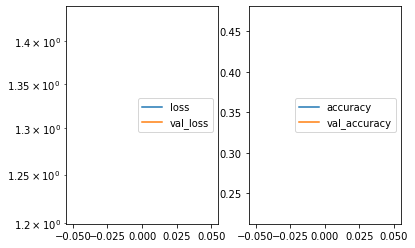

Predicted cell: Normal Probability: [[0.38020733]]
True Cell type: NonMatureP1
x [[0.48611]]
True positional value x 0.5
y [[0.5104698]]
True positional value y 0.5
t [[0.46316257]]
True positional value t 0.5
h [[0.5162545]]
True positional value h 0.5
w [[0.48795885]]
True positional value w 0.5
c [[0.95899737]]
True positional value c 1.0


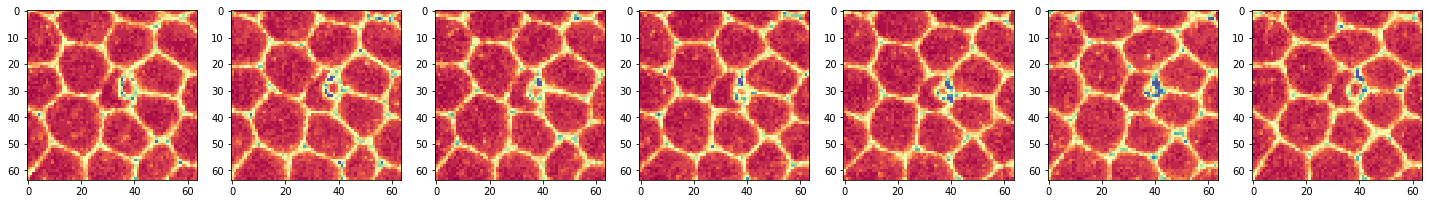

Epoch 2/250
14184/14184 [==============================] - 295s 21ms/step - loss: 1.1457 - accuracy: 0.3873 - val_loss: 1.1190 - val_accuracy: 0.3735

Epoch 00002: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


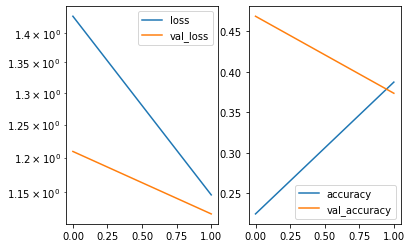

Predicted cell: Division Probability: [[0.9707285]]
True Cell type: Division
x [[0.5192035]]
True positional value x 0.5
y [[0.55870885]]
True positional value y 0.5
t [[0.5167117]]
True positional value t 0.5
h [[0.5045533]]
True positional value h 0.5
w [[0.52293015]]
True positional value w 0.5
c [[0.98627543]]
True positional value c 1.0


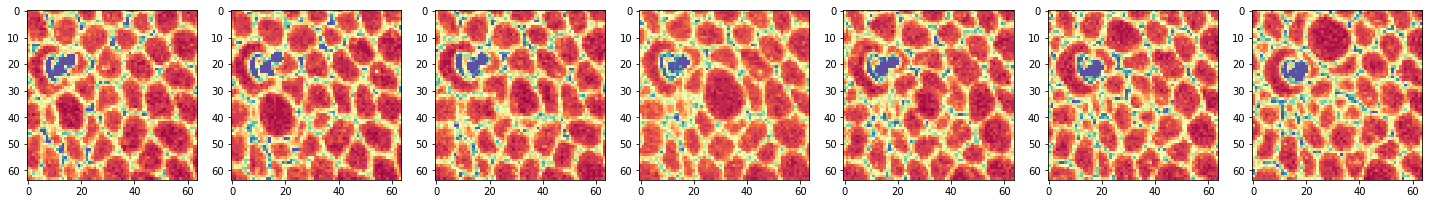

Epoch 3/250
14184/14184 [==============================] - 290s 20ms/step - loss: 1.0946 - accuracy: 0.4084 - val_loss: 1.1312 - val_accuracy: 0.1847

Epoch 00003: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


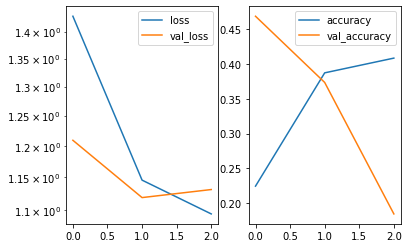

Predicted cell: Normal Probability: [[0.9250186]]
True Cell type: Normal
x [[0.48917353]]
True positional value x 0.5
y [[0.5032111]]
True positional value y 0.5
t [[0.5090692]]
True positional value t 0.5
h [[0.5261585]]
True positional value h 0.5
w [[0.53340626]]
True positional value w 0.5
c [[0.50275064]]
True positional value c 0.0


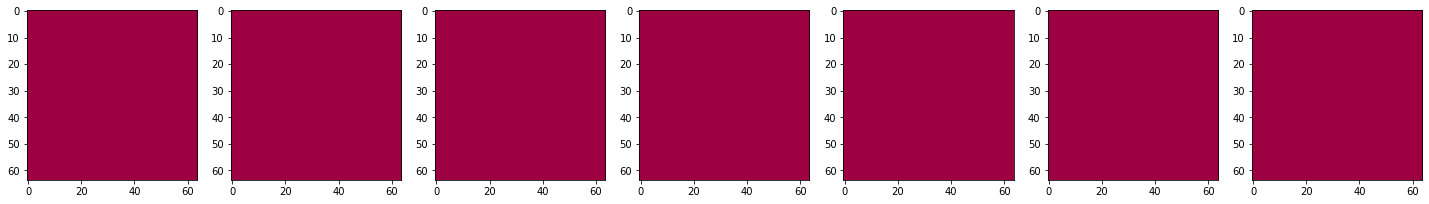

Epoch 4/250
14184/14184 [==============================] - 290s 20ms/step - loss: 1.0396 - accuracy: 0.3959 - val_loss: 1.0462 - val_accuracy: 0.2624

Epoch 00004: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


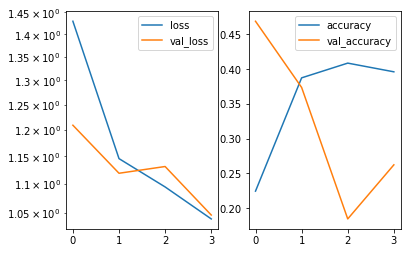

Predicted cell: Normal Probability: [[0.9119756]]
True Cell type: Normal
x [[0.44960308]]
True positional value x 0.5
y [[0.51163]]
True positional value y 0.5
t [[0.4893758]]
True positional value t 0.5
h [[0.48201558]]
True positional value h 0.5
w [[0.520945]]
True positional value w 0.5
c [[0.950409]]
True positional value c 1.0


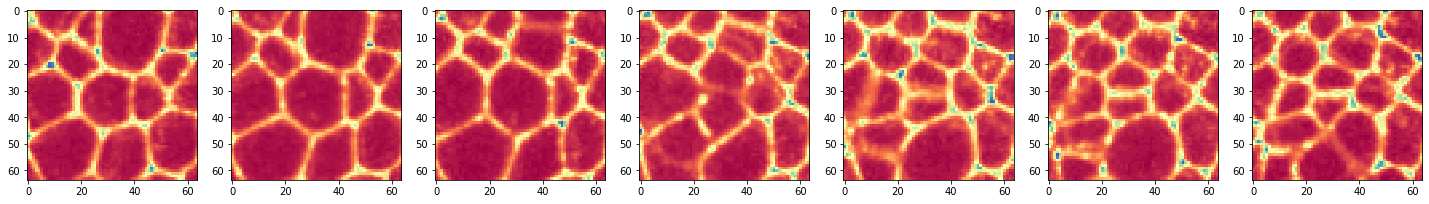

Epoch 5/250
14184/14184 [==============================] - 291s 21ms/step - loss: 1.0248 - accuracy: 0.4057 - val_loss: 1.0455 - val_accuracy: 0.5167

Epoch 00005: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


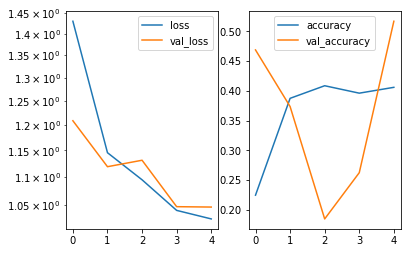

Predicted cell: Normal Probability: [[0.76154846]]
True Cell type: Normal
x [[0.4990574]]
True positional value x 0.5
y [[0.50368184]]
True positional value y 0.5
t [[0.49999917]]
True positional value t 0.5
h [[0.5026729]]
True positional value h 0.5
w [[0.49194208]]
True positional value w 0.5
c [[0.26703706]]
True positional value c 0.0


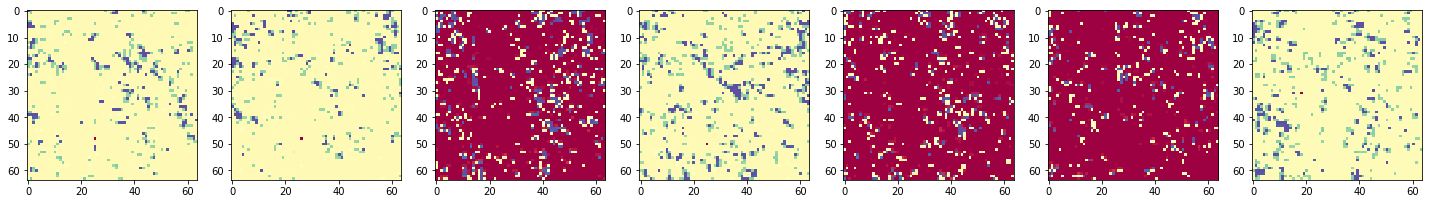

Epoch 6/250
14184/14184 [==============================] - 293s 21ms/step - loss: 1.0009 - accuracy: 0.3989 - val_loss: 1.0727 - val_accuracy: 0.4632

Epoch 00006: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


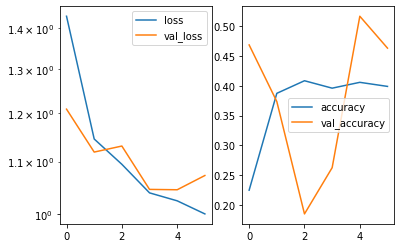

Predicted cell: Division Probability: [[0.98570734]]
True Cell type: Division
x [[0.48345464]]
True positional value x 0.5
y [[0.50503516]]
True positional value y 0.5
t [[0.4960164]]
True positional value t 0.5
h [[0.4735441]]
True positional value h 0.5
w [[0.50365525]]
True positional value w 0.5
c [[0.9610351]]
True positional value c 1.0


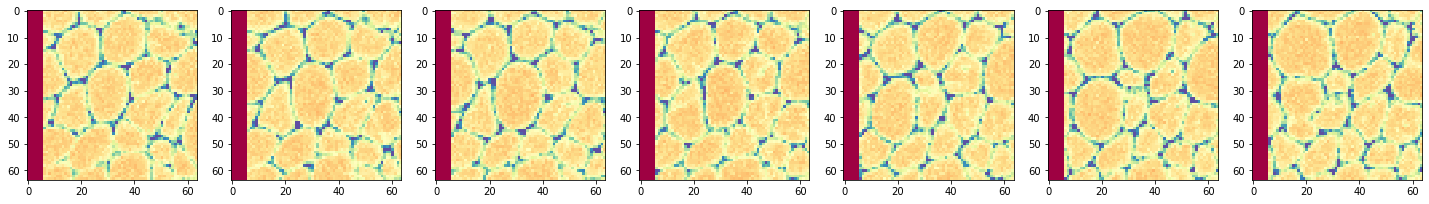

Epoch 7/250
14184/14184 [==============================] - 290s 20ms/step - loss: 0.9861 - accuracy: 0.4164 - val_loss: 1.1086 - val_accuracy: 0.2838

Epoch 00007: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


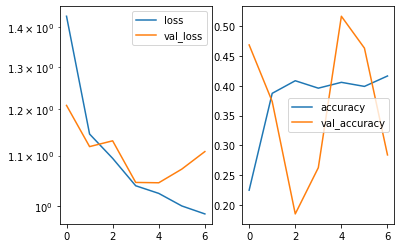

Predicted cell: MatureP1 Probability: [[0.8660419]]
True Cell type: MatureP1
x [[0.5727646]]
True positional value x 0.5
y [[0.47247297]]
True positional value y 0.5
t [[0.525047]]
True positional value t 0.5
h [[0.52725476]]
True positional value h 0.5
w [[0.5104591]]
True positional value w 0.5
c [[0.83238256]]
True positional value c 1.0


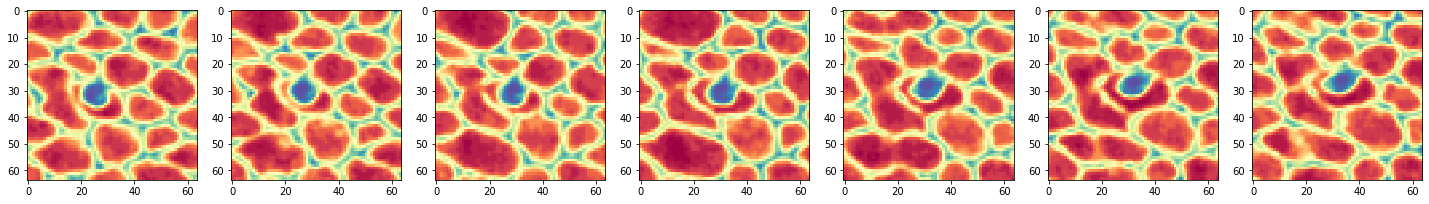

Epoch 8/250
14184/14184 [==============================] - 293s 21ms/step - loss: 0.9712 - accuracy: 0.4368 - val_loss: 1.0252 - val_accuracy: 0.5716

Epoch 00008: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


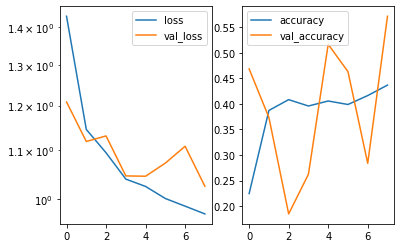

Predicted cell: MatureP1 Probability: [[0.6576611]]
True Cell type: MatureP1
x [[0.5035905]]
True positional value x 0.5
y [[0.5146715]]
True positional value y 0.5
t [[0.506669]]
True positional value t 0.5
h [[0.48905405]]
True positional value h 0.5
w [[0.48935056]]
True positional value w 0.5
c [[0.962946]]
True positional value c 1.0


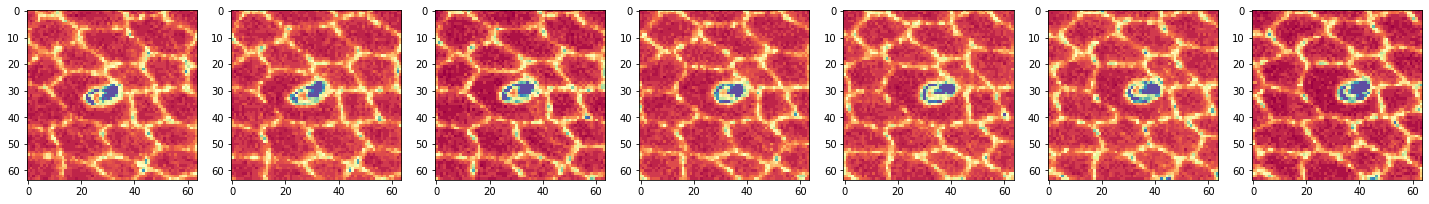

Epoch 9/250
14184/14184 [==============================] - 292s 21ms/step - loss: 0.9493 - accuracy: 0.4416 - val_loss: 1.0464 - val_accuracy: 0.3347

Epoch 00009: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


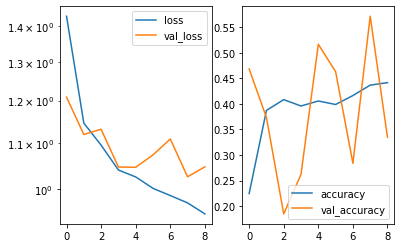

Predicted cell: Normal Probability: [[0.47807026]]
True Cell type: Apoptosis
x [[0.50338215]]
True positional value x 0.5
y [[0.49017477]]
True positional value y 0.5
t [[0.48234496]]
True positional value t 0.5
h [[0.50139123]]
True positional value h 0.5
w [[0.48211288]]
True positional value w 0.5
c [[0.98822486]]
True positional value c 1.0


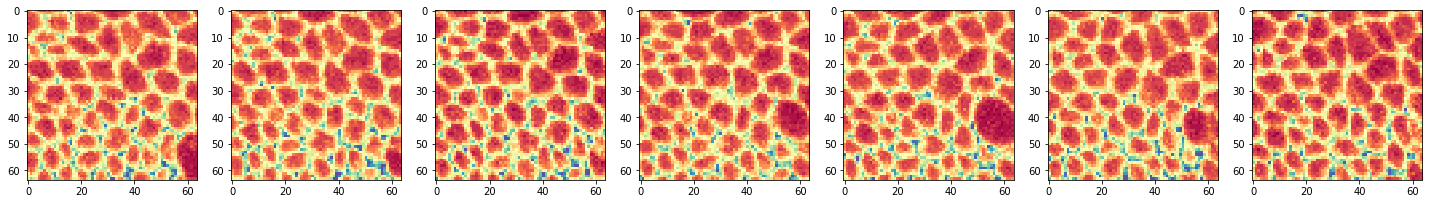

Epoch 10/250
14184/14184 [==============================] - 294s 21ms/step - loss: 0.9287 - accuracy: 0.4337 - val_loss: 1.0649 - val_accuracy: 0.5489

Epoch 00010: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


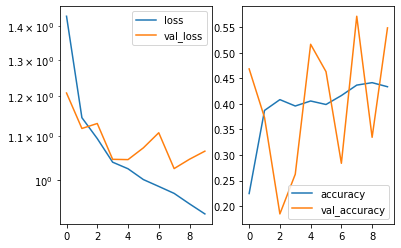

Predicted cell: Division Probability: [[0.99419314]]
True Cell type: Division
x [[0.49423948]]
True positional value x 0.5
y [[0.49565724]]
True positional value y 0.5
t [[0.5043125]]
True positional value t 0.5
h [[0.5008008]]
True positional value h 0.5
w [[0.49383503]]
True positional value w 0.5
c [[0.9858722]]
True positional value c 1.0


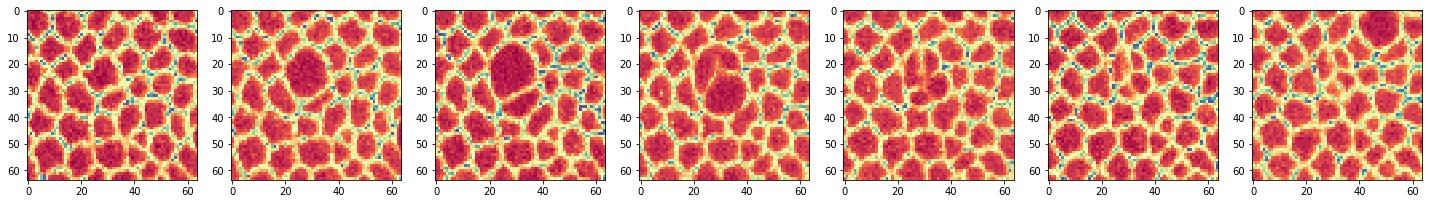

Epoch 11/250
14184/14184 [==============================] - 290s 20ms/step - loss: 0.9201 - accuracy: 0.4387 - val_loss: 1.0475 - val_accuracy: 0.4739

Epoch 00011: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


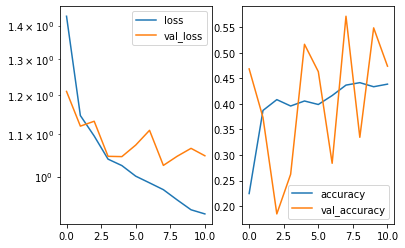

Predicted cell: Apoptosis Probability: [[0.814049]]
True Cell type: Normal
x [[0.5043567]]
True positional value x 0.5
y [[0.49962655]]
True positional value y 0.5
t [[0.50367004]]
True positional value t 0.5
h [[0.50031626]]
True positional value h 0.5
w [[0.5169422]]
True positional value w 0.5
c [[0.9869609]]
True positional value c 1.0


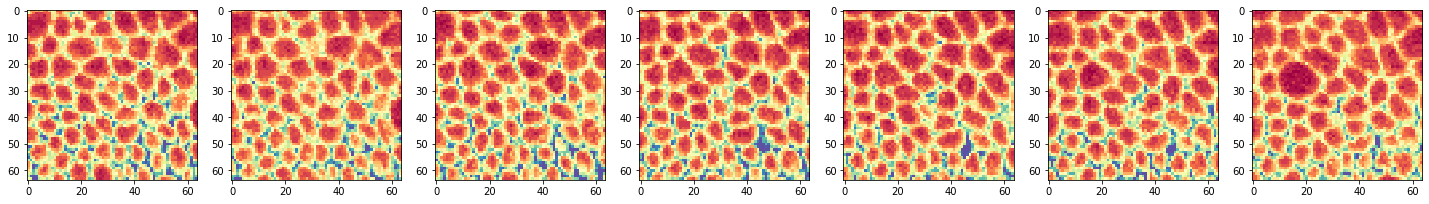

Epoch 12/250
14184/14184 [==============================] - 288s 20ms/step - loss: 0.9103 - accuracy: 0.4741 - val_loss: 1.6090 - val_accuracy: 0.0817

Epoch 00012: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


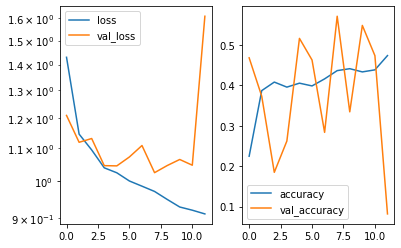

Predicted cell: Apoptosis Probability: [[0.5109882]]
True Cell type: Division
x [[0.47490168]]
True positional value x 0.5
y [[0.49703926]]
True positional value y 0.5
t [[0.4838009]]
True positional value t 0.5
h [[0.51063925]]
True positional value h 0.5
w [[0.51651824]]
True positional value w 0.5
c [[0.9885837]]
True positional value c 1.0


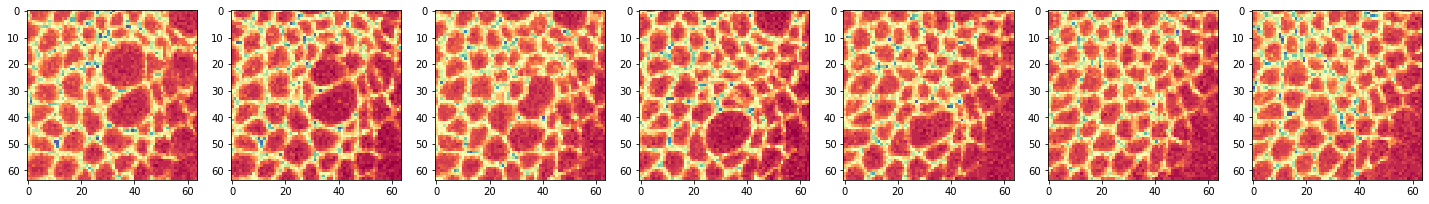

Epoch 13/250
14184/14184 [==============================] - 285s 20ms/step - loss: 0.8952 - accuracy: 0.4896 - val_loss: 1.0556 - val_accuracy: 0.4578

Epoch 00013: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


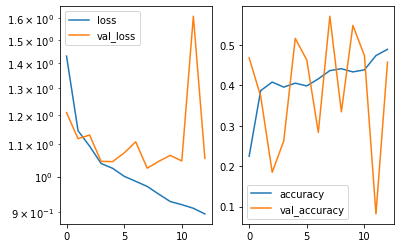

Predicted cell: MatureP1 Probability: [[0.420682]]
True Cell type: Normal
x [[0.51176995]]
True positional value x 0.5
y [[0.50117403]]
True positional value y 0.5
t [[0.48757428]]
True positional value t 0.5
h [[0.49013433]]
True positional value h 0.5
w [[0.49697718]]
True positional value w 0.5
c [[0.99150485]]
True positional value c 1.0


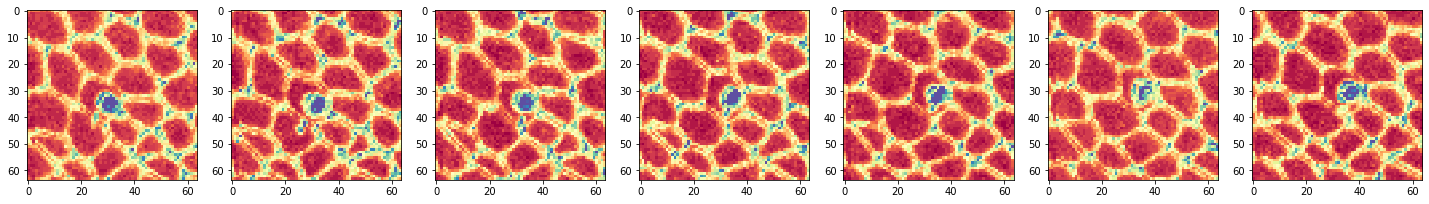

Epoch 14/250
14184/14184 [==============================] - 283s 20ms/step - loss: 0.8796 - accuracy: 0.4922 - val_loss: 1.0675 - val_accuracy: 0.5756

Epoch 00014: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


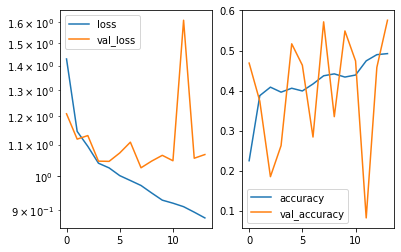

Predicted cell: Division Probability: [[0.99998415]]
True Cell type: Division
x [[0.48340833]]
True positional value x 0.5
y [[0.50239056]]
True positional value y 0.5
t [[0.4988086]]
True positional value t 0.5
h [[0.504849]]
True positional value h 0.5
w [[0.52222323]]
True positional value w 0.5
c [[0.9920042]]
True positional value c 1.0


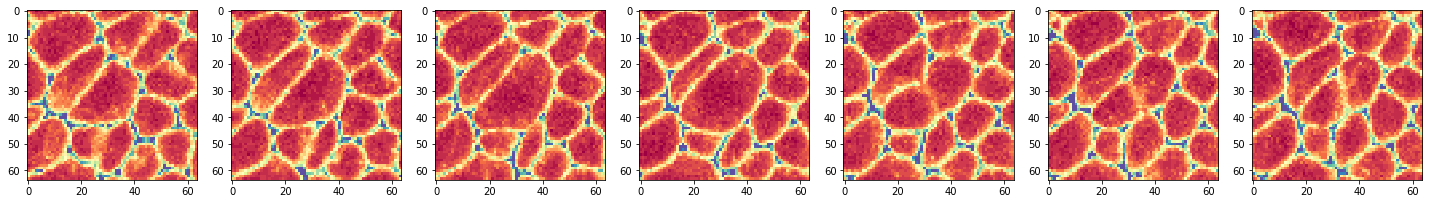

Epoch 15/250
14184/14184 [==============================] - 287s 20ms/step - loss: 0.8679 - accuracy: 0.4848 - val_loss: 1.0377 - val_accuracy: 0.5502

Epoch 00015: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


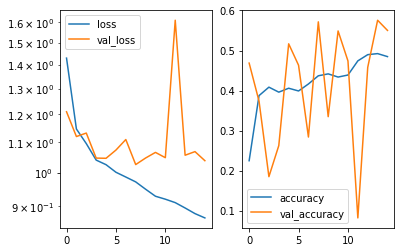

Predicted cell: Division Probability: [[0.69530284]]
True Cell type: Normal
x [[0.49409392]]
True positional value x 0.5
y [[0.485696]]
True positional value y 0.5
t [[0.4818466]]
True positional value t 0.5
h [[0.48621157]]
True positional value h 0.5
w [[0.4897983]]
True positional value w 0.5
c [[0.9736434]]
True positional value c 1.0


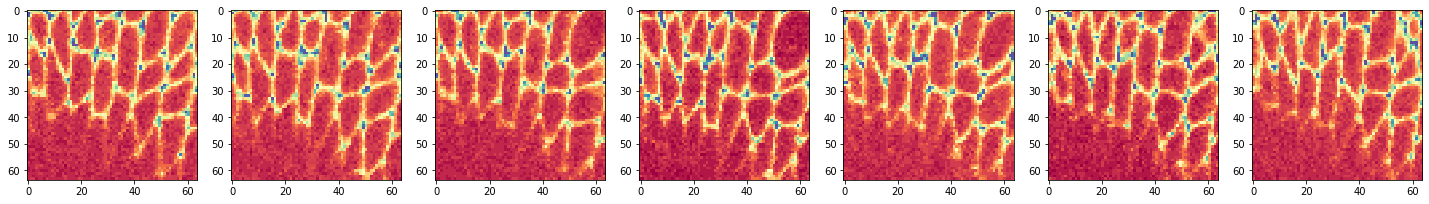

Epoch 16/250
14184/14184 [==============================] - 285s 20ms/step - loss: 0.8642 - accuracy: 0.4901 - val_loss: 1.0708 - val_accuracy: 0.5489

Epoch 00016: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


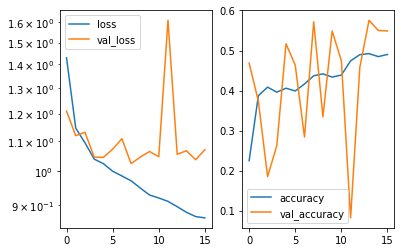

Predicted cell: Division Probability: [[0.8621044]]
True Cell type: Division
x [[0.51114607]]
True positional value x 0.5
y [[0.5073409]]
True positional value y 0.5
t [[0.4981348]]
True positional value t 0.5
h [[0.49505067]]
True positional value h 0.5
w [[0.49642056]]
True positional value w 0.5
c [[0.99374783]]
True positional value c 1.0


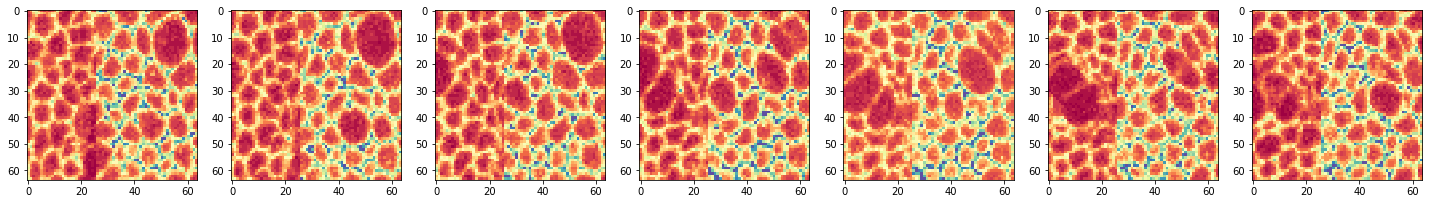

Epoch 17/250
14184/14184 [==============================] - 287s 20ms/step - loss: 0.8538 - accuracy: 0.5104 - val_loss: 1.0547 - val_accuracy: 0.4190

Epoch 00017: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


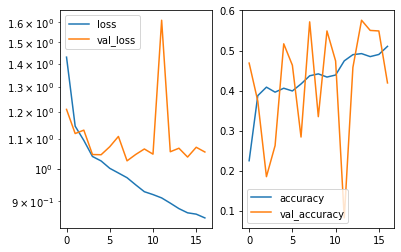

Predicted cell: Division Probability: [[0.9990797]]
True Cell type: Division
x [[0.48132735]]
True positional value x 0.5
y [[0.49182186]]
True positional value y 0.5
t [[0.50354964]]
True positional value t 0.5
h [[0.50048435]]
True positional value h 0.5
w [[0.50328606]]
True positional value w 0.5
c [[0.9886919]]
True positional value c 1.0


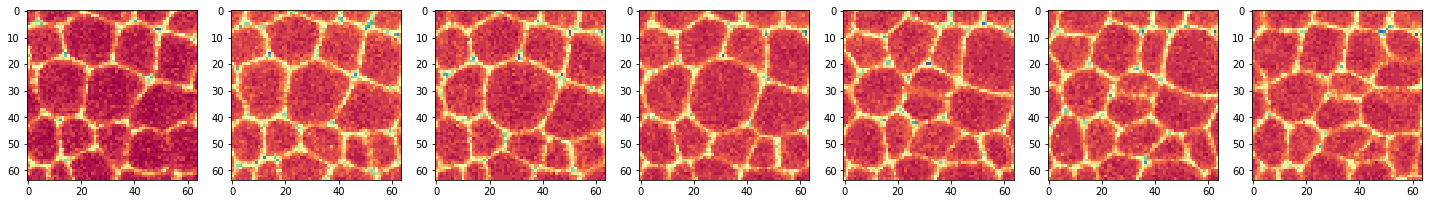

Epoch 18/250
14184/14184 [==============================] - 283s 20ms/step - loss: 0.8410 - accuracy: 0.5250 - val_loss: 1.0550 - val_accuracy: 0.5582

Epoch 00018: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


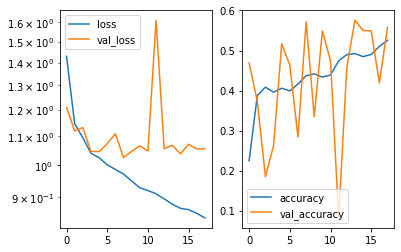

Predicted cell: Normal Probability: [[0.8334538]]
True Cell type: Apoptosis
x [[0.50666404]]
True positional value x 0.5
y [[0.49490908]]
True positional value y 0.5
t [[0.5068265]]
True positional value t 0.5
h [[0.5081653]]
True positional value h 0.5
w [[0.44912118]]
True positional value w 0.5
c [[0.9131862]]
True positional value c 0.0


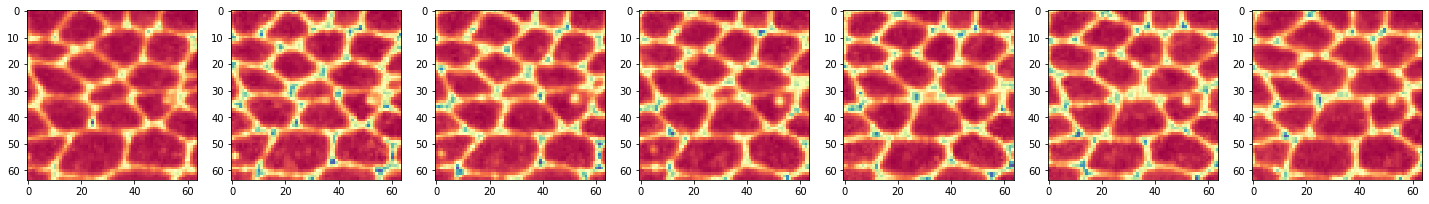

Epoch 19/250
14184/14184 [==============================] - 285s 20ms/step - loss: 0.8376 - accuracy: 0.5072 - val_loss: 1.0691 - val_accuracy: 0.1205

Epoch 00019: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


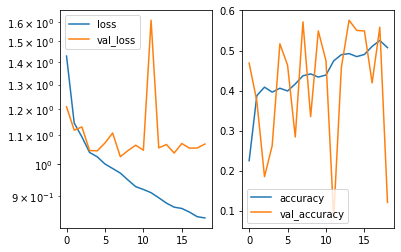

Predicted cell: Division Probability: [[0.9665486]]
True Cell type: Division
x [[0.50773793]]
True positional value x 0.5
y [[0.5142568]]
True positional value y 0.5
t [[0.5029089]]
True positional value t 0.5
h [[0.51296055]]
True positional value h 0.5
w [[0.49878323]]
True positional value w 0.5
c [[0.9964477]]
True positional value c 1.0


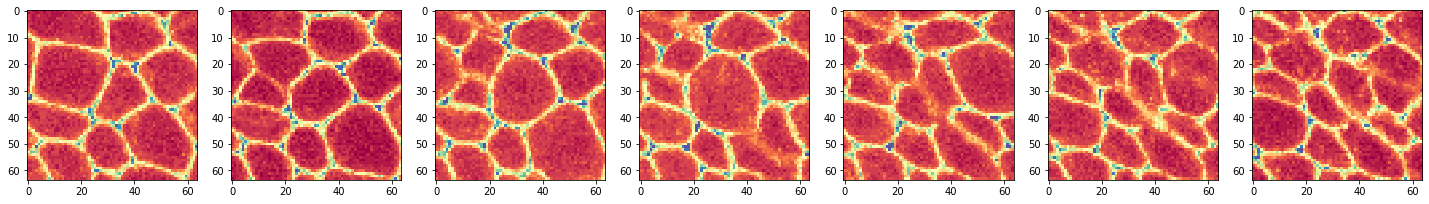

Epoch 20/250
14184/14184 [==============================] - 288s 20ms/step - loss: 0.8295 - accuracy: 0.5212 - val_loss: 1.0839 - val_accuracy: 0.5181

Epoch 00020: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


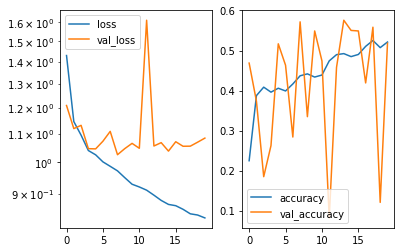

Predicted cell: Division Probability: [[0.5740059]]
True Cell type: Apoptosis
x [[0.49420702]]
True positional value x 0.5
y [[0.50701374]]
True positional value y 0.5
t [[0.51022947]]
True positional value t 0.5
h [[0.5038624]]
True positional value h 0.5
w [[0.49372083]]
True positional value w 0.5
c [[0.9383473]]
True positional value c 1.0


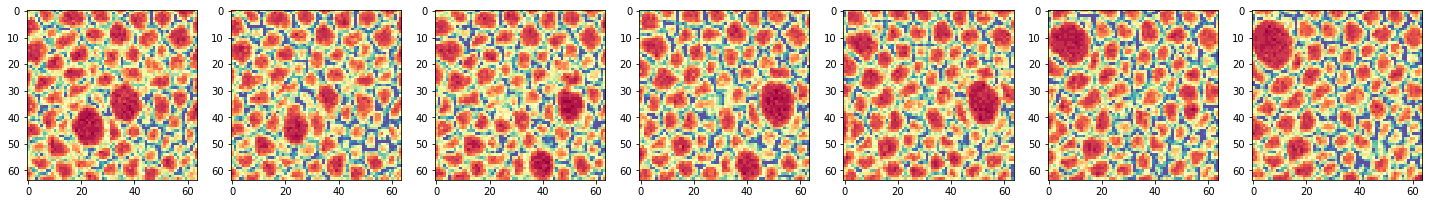

Epoch 21/250
14184/14184 [==============================] - 285s 20ms/step - loss: 0.8145 - accuracy: 0.5290 - val_loss: 1.0419 - val_accuracy: 0.5047

Epoch 00021: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


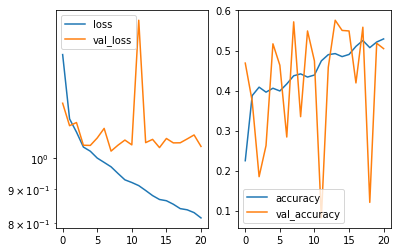

Predicted cell: Division Probability: [[0.9934477]]
True Cell type: Division
x [[0.5051458]]
True positional value x 0.5
y [[0.5065074]]
True positional value y 0.5
t [[0.49166042]]
True positional value t 0.5
h [[0.50632143]]
True positional value h 0.5
w [[0.5014443]]
True positional value w 0.5
c [[0.99286485]]
True positional value c 1.0


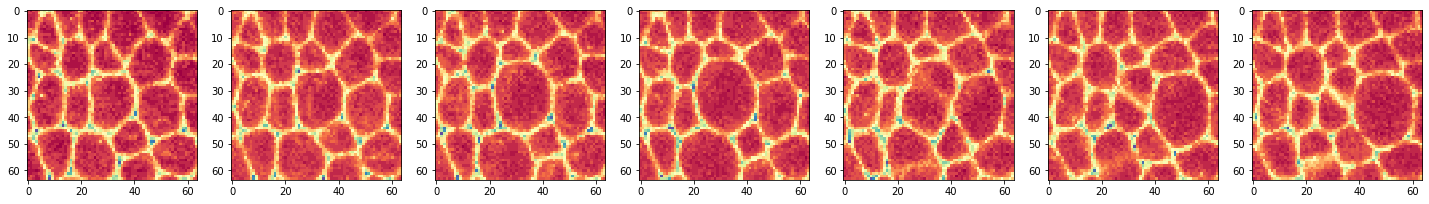

Epoch 22/250
14184/14184 [==============================] - 284s 20ms/step - loss: 0.8130 - accuracy: 0.5288 - val_loss: 1.1206 - val_accuracy: 0.5596

Epoch 00022: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


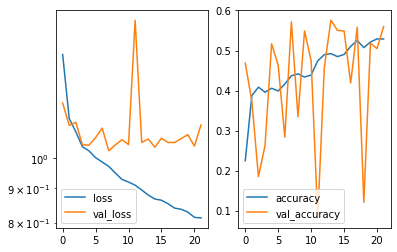

Predicted cell: Normal Probability: [[0.6812746]]
True Cell type: Normal
x [[0.5162421]]
True positional value x 0.5
y [[0.51222676]]
True positional value y 0.5
t [[0.49482173]]
True positional value t 0.5
h [[0.4780263]]
True positional value h 0.5
w [[0.49116424]]
True positional value w 0.5
c [[0.99276966]]
True positional value c 1.0


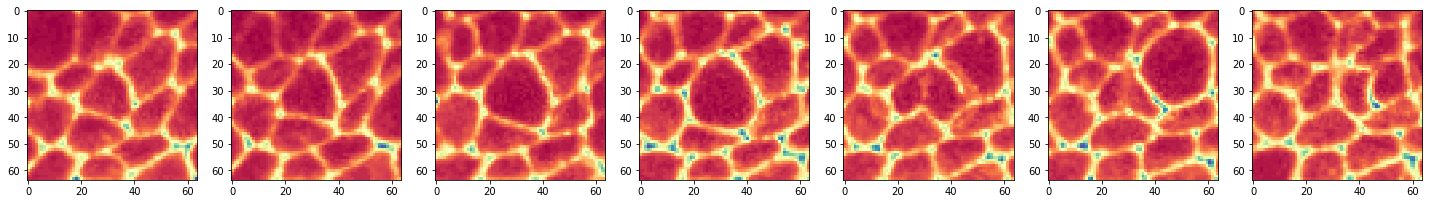

Epoch 23/250
14184/14184 [==============================] - 288s 20ms/step - loss: 0.8121 - accuracy: 0.5316 - val_loss: 1.0811 - val_accuracy: 0.5703

Epoch 00023: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


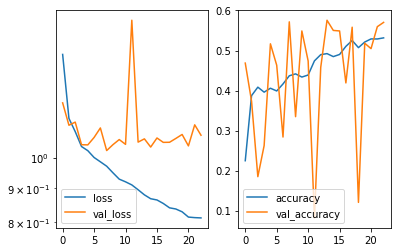

Predicted cell: Normal Probability: [[0.5971568]]
True Cell type: Normal
x [[0.5006813]]
True positional value x 0.5
y [[0.5028301]]
True positional value y 0.5
t [[0.48488784]]
True positional value t 0.5
h [[0.4881431]]
True positional value h 0.5
w [[0.50254697]]
True positional value w 0.5
c [[0.99615675]]
True positional value c 1.0


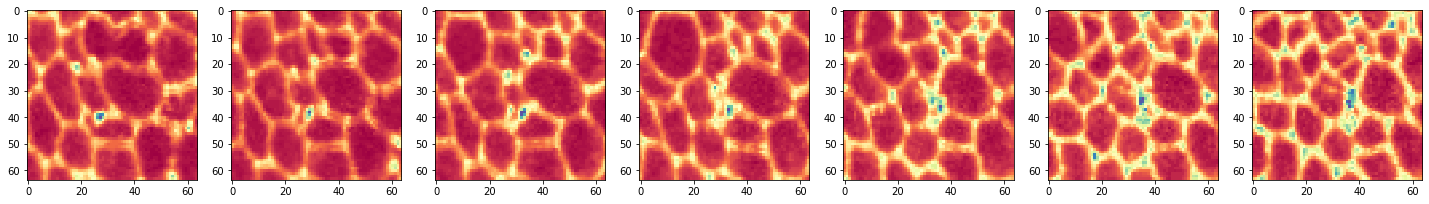

Epoch 24/250
14184/14184 [==============================] - 285s 20ms/step - loss: 0.7958 - accuracy: 0.5410 - val_loss: 1.0711 - val_accuracy: 0.6225

Epoch 00024: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


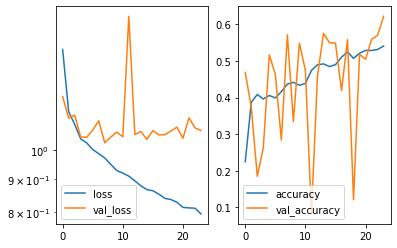

Predicted cell: Normal Probability: [[0.99563146]]
True Cell type: Normal
x [[0.49278083]]
True positional value x 0.5
y [[0.51167387]]
True positional value y 0.5
t [[0.50308746]]
True positional value t 0.5
h [[0.5019108]]
True positional value h 0.5
w [[0.5039519]]
True positional value w 0.5
c [[0.9821874]]
True positional value c 1.0


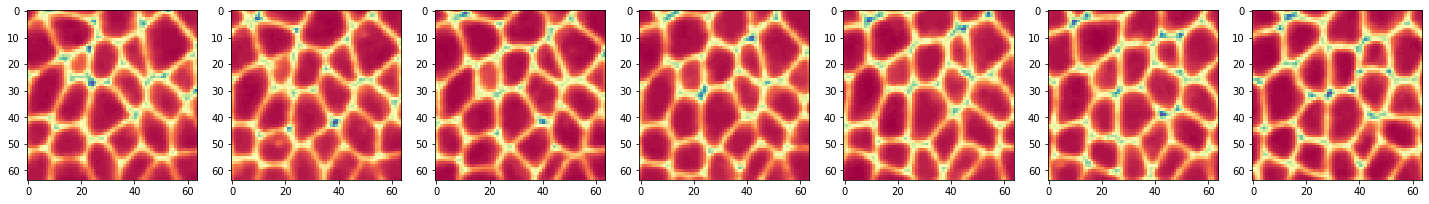

Epoch 25/250
14184/14184 [==============================] - 286s 20ms/step - loss: 0.7948 - accuracy: 0.5408 - val_loss: 1.1058 - val_accuracy: 0.5984

Epoch 00025: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


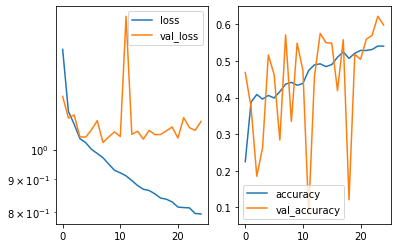

Predicted cell: Division Probability: [[0.999998]]
True Cell type: Division
x [[0.50201935]]
True positional value x 0.5
y [[0.48562023]]
True positional value y 0.5
t [[0.5007184]]
True positional value t 0.5
h [[0.49932915]]
True positional value h 0.5
w [[0.49634302]]
True positional value w 0.5
c [[0.9504141]]
True positional value c 1.0


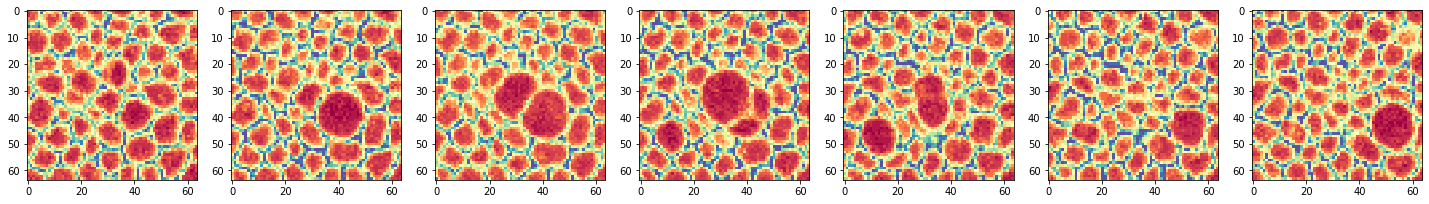

Epoch 26/250
14184/14184 [==============================] - 284s 20ms/step - loss: 0.7864 - accuracy: 0.5419 - val_loss: 1.1270 - val_accuracy: 0.5957

Epoch 00026: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


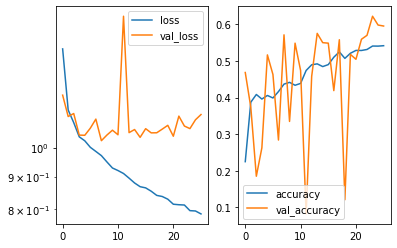

Predicted cell: Division Probability: [[0.99926656]]
True Cell type: Division
x [[0.50660115]]
True positional value x 0.5
y [[0.49578705]]
True positional value y 0.5
t [[0.4897367]]
True positional value t 0.5
h [[0.49129784]]
True positional value h 0.5
w [[0.511626]]
True positional value w 0.5
c [[0.95805514]]
True positional value c 1.0


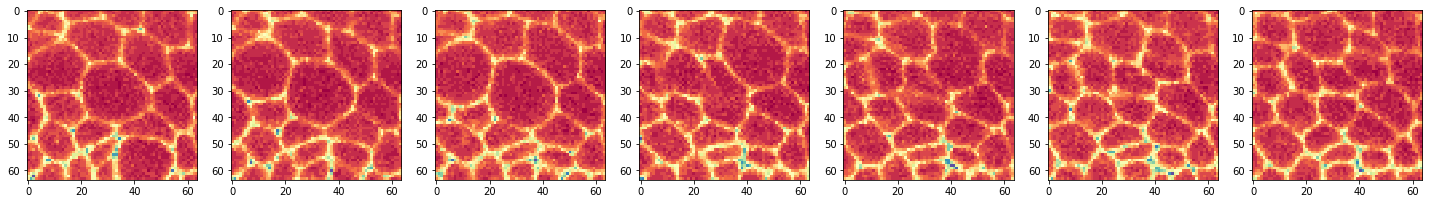

Epoch 27/250
14184/14184 [==============================] - 285s 20ms/step - loss: 0.7796 - accuracy: 0.5429 - val_loss: 1.0736 - val_accuracy: 0.4177

Epoch 00027: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


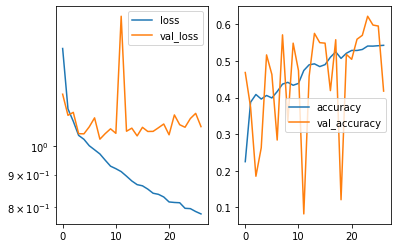

Predicted cell: Division Probability: [[0.9979113]]
True Cell type: Division
x [[0.5123299]]
True positional value x 0.5
y [[0.5001067]]
True positional value y 0.5
t [[0.5036567]]
True positional value t 0.5
h [[0.51477575]]
True positional value h 0.5
w [[0.52596104]]
True positional value w 0.5
c [[0.9806638]]
True positional value c 1.0


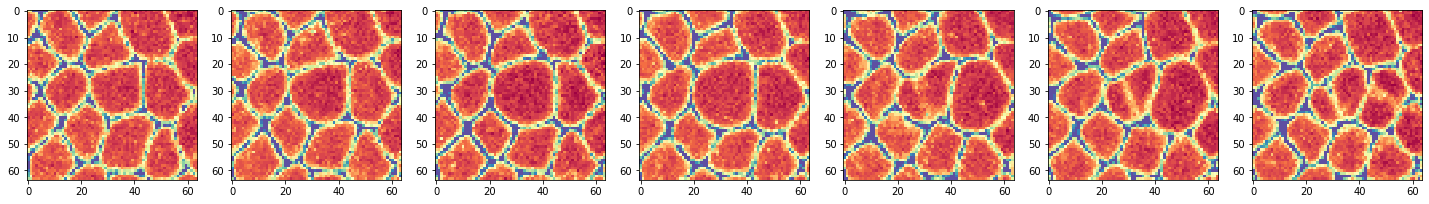

Epoch 28/250
14184/14184 [==============================] - 286s 20ms/step - loss: 0.7753 - accuracy: 0.5513 - val_loss: 1.0918 - val_accuracy: 0.4270

Epoch 00028: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


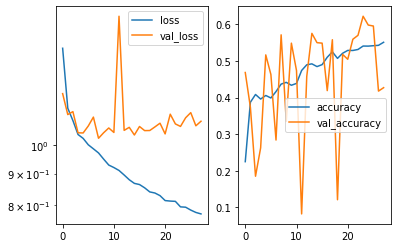

Predicted cell: NonMatureP1 Probability: [[0.9478414]]
True Cell type: NonMatureP1
x [[0.5124514]]
True positional value x 0.5
y [[0.52615595]]
True positional value y 0.5
t [[0.48251233]]
True positional value t 0.5
h [[0.48182872]]
True positional value h 0.5
w [[0.49859312]]
True positional value w 0.5
c [[0.99834895]]
True positional value c 1.0


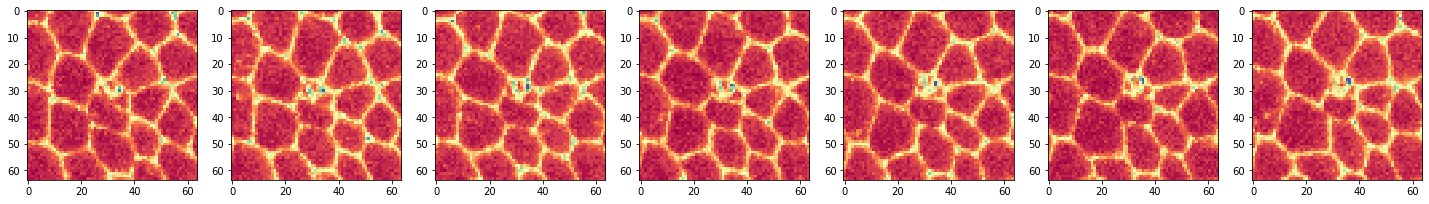

Epoch 29/250
14184/14184 [==============================] - 284s 20ms/step - loss: 0.7666 - accuracy: 0.5482 - val_loss: 1.1045 - val_accuracy: 0.5462

Epoch 00029: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


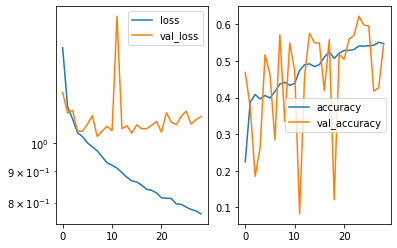

Predicted cell: Normal Probability: [[0.69421256]]
True Cell type: Apoptosis
x [[0.49582505]]
True positional value x 0.5
y [[0.52166533]]
True positional value y 0.5
t [[0.503572]]
True positional value t 0.5
h [[0.5035135]]
True positional value h 0.5
w [[0.502831]]
True positional value w 0.5
c [[0.9640814]]
True positional value c 1.0


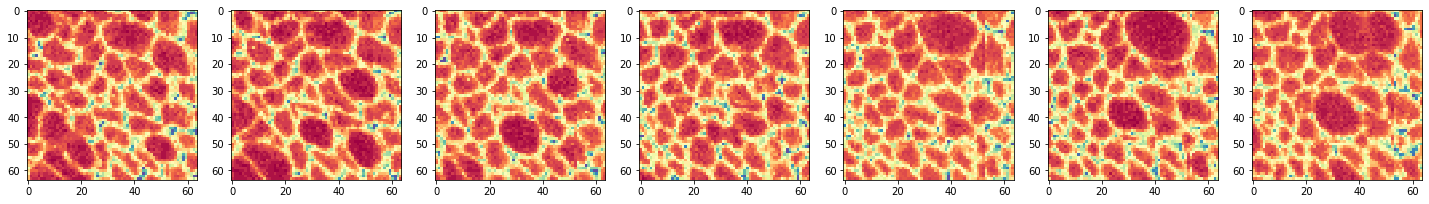

Epoch 30/250
14184/14184 [==============================] - 287s 20ms/step - loss: 0.7577 - accuracy: 0.5551 - val_loss: 1.1216 - val_accuracy: 0.5957

Epoch 00030: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


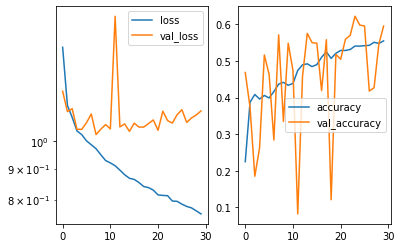

Predicted cell: Division Probability: [[0.83632106]]
True Cell type: Apoptosis
x [[0.5001527]]
True positional value x 0.5
y [[0.49537453]]
True positional value y 0.5
t [[0.5061945]]
True positional value t 0.5
h [[0.46612415]]
True positional value h 0.5
w [[0.49390784]]
True positional value w 0.5
c [[0.9890947]]
True positional value c 1.0


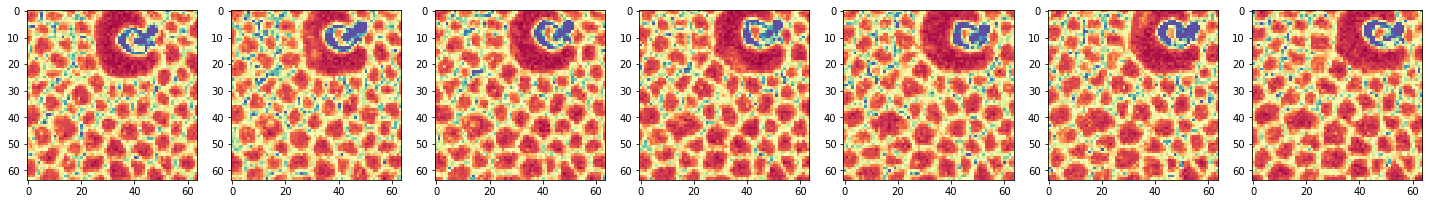

Epoch 31/250
14184/14184 [==============================] - 280s 20ms/step - loss: 0.7606 - accuracy: 0.5486 - val_loss: 1.0387 - val_accuracy: 0.2463

Epoch 00031: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


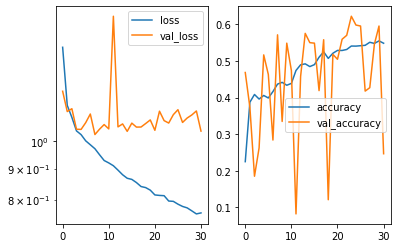

Predicted cell: Division Probability: [[0.9401297]]
True Cell type: Division
x [[0.5048337]]
True positional value x 0.5
y [[0.48263836]]
True positional value y 0.5
t [[0.50284153]]
True positional value t 0.5
h [[0.5066226]]
True positional value h 0.5
w [[0.511303]]
True positional value w 0.5
c [[0.999233]]
True positional value c 1.0


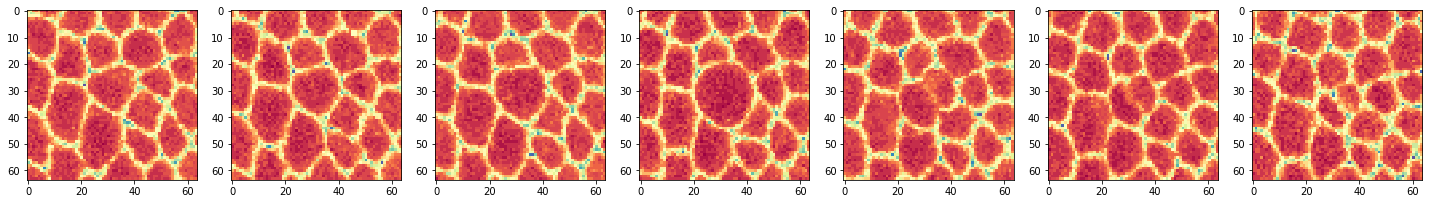

Epoch 32/250
14184/14184 [==============================] - 284s 20ms/step - loss: 0.7497 - accuracy: 0.5550 - val_loss: 1.0927 - val_accuracy: 0.5689

Epoch 00032: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


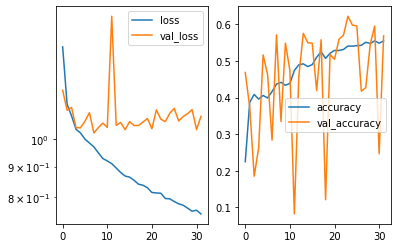

Predicted cell: Division Probability: [[0.99087113]]
True Cell type: Division
x [[0.4932591]]
True positional value x 0.5
y [[0.5056423]]
True positional value y 0.5
t [[0.4981444]]
True positional value t 0.5
h [[0.47572255]]
True positional value h 0.5
w [[0.49598515]]
True positional value w 0.5
c [[0.99275345]]
True positional value c 1.0


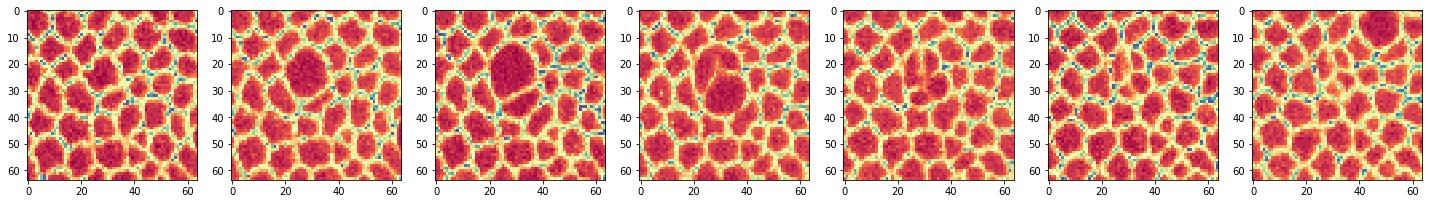

Epoch 33/250
14184/14184 [==============================] - 287s 20ms/step - loss: 0.7444 - accuracy: 0.5342 - val_loss: 1.0545 - val_accuracy: 0.4163

Epoch 00033: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


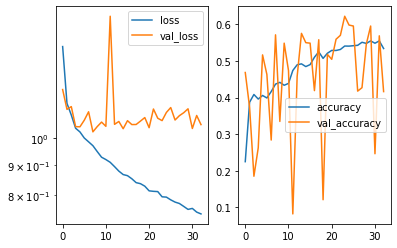

Predicted cell: Division Probability: [[0.9882174]]
True Cell type: Division
x [[0.5104019]]
True positional value x 0.5
y [[0.500269]]
True positional value y 0.5
t [[0.5206963]]
True positional value t 0.5
h [[0.48802552]]
True positional value h 0.5
w [[0.5176095]]
True positional value w 0.5
c [[0.9973346]]
True positional value c 1.0


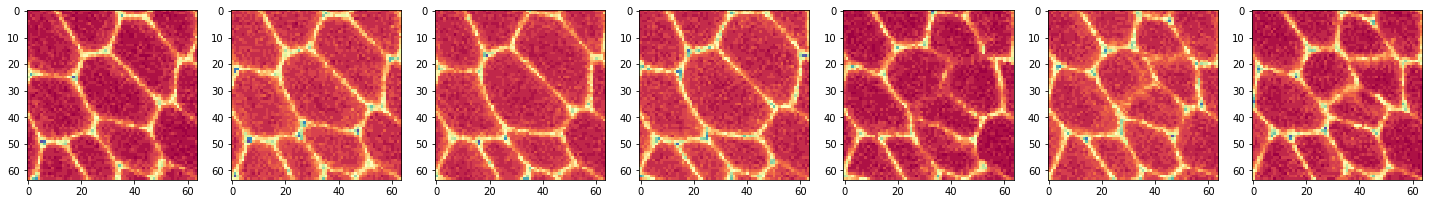

Epoch 34/250
14184/14184 [==============================] - 284s 20ms/step - loss: 0.7425 - accuracy: 0.5310 - val_loss: 1.0714 - val_accuracy: 0.3815

Epoch 00034: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


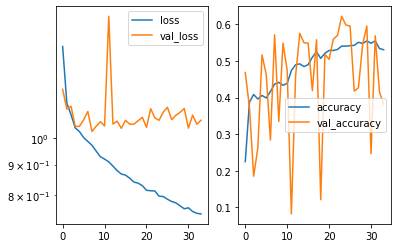

Predicted cell: Division Probability: [[0.9998129]]
True Cell type: Division
x [[0.507493]]
True positional value x 0.5
y [[0.5005854]]
True positional value y 0.5
t [[0.50232124]]
True positional value t 0.5
h [[0.49977836]]
True positional value h 0.5
w [[0.5082907]]
True positional value w 0.5
c [[0.9973527]]
True positional value c 1.0


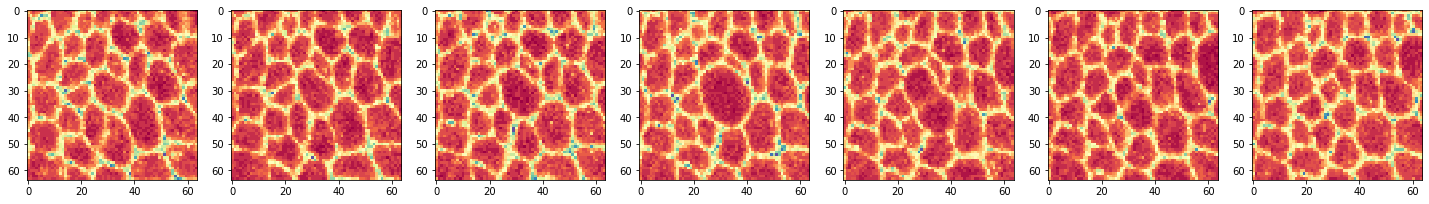

Epoch 35/250
14184/14184 [==============================] - 289s 20ms/step - loss: 0.7332 - accuracy: 0.5449 - val_loss: 1.0909 - val_accuracy: 0.2102

Epoch 00035: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


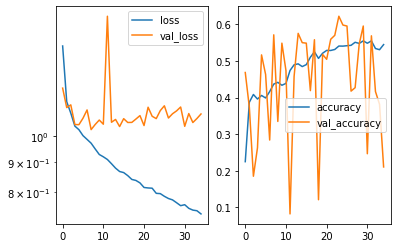

Predicted cell: MatureP1 Probability: [[0.8817172]]
True Cell type: Normal
x [[0.49580422]]
True positional value x 0.5
y [[0.49423087]]
True positional value y 0.5
t [[0.48643667]]
True positional value t 0.5
h [[0.48066127]]
True positional value h 0.5
w [[0.4860791]]
True positional value w 0.5
c [[0.9961972]]
True positional value c 1.0


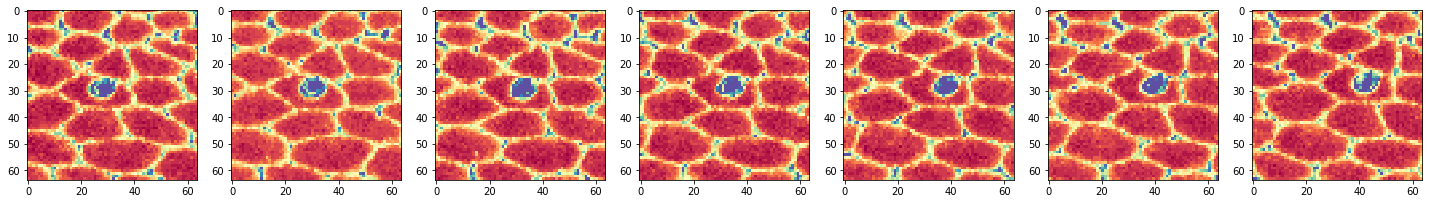

Epoch 36/250
14184/14184 [==============================] - 293s 21ms/step - loss: 0.7325 - accuracy: 0.5157 - val_loss: 1.1106 - val_accuracy: 0.3869

Epoch 00036: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


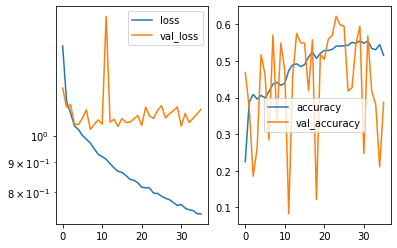

Predicted cell: Normal Probability: [[0.62547684]]
True Cell type: Apoptosis
x [[0.51425153]]
True positional value x 0.5
y [[0.5024948]]
True positional value y 0.5
t [[0.51264405]]
True positional value t 0.5
h [[0.52610016]]
True positional value h 0.5
w [[0.4986524]]
True positional value w 0.5
c [[0.93033373]]
True positional value c 1.0


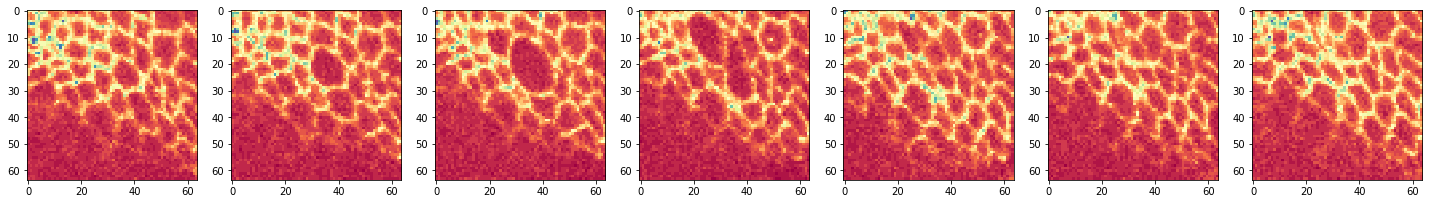

Epoch 37/250
14184/14184 [==============================] - 293s 21ms/step - loss: 0.7228 - accuracy: 0.5276 - val_loss: 1.0847 - val_accuracy: 0.5207

Epoch 00037: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


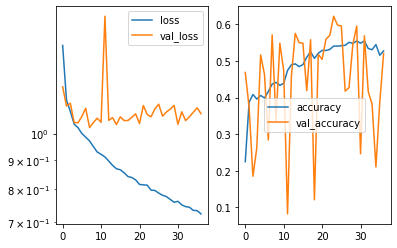

Predicted cell: Normal Probability: [[0.5854694]]
True Cell type: Apoptosis
x [[0.5015363]]
True positional value x 0.5
y [[0.5047101]]
True positional value y 0.5
t [[0.4948891]]
True positional value t 0.5
h [[0.48900518]]
True positional value h 0.5
w [[0.4765242]]
True positional value w 0.5
c [[0.9826208]]
True positional value c 1.0


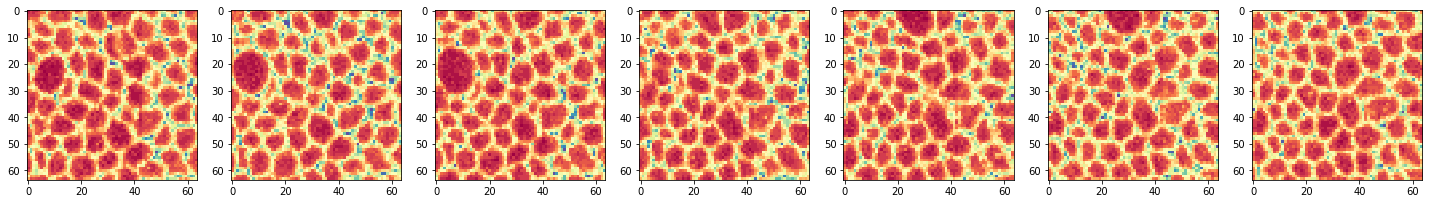

Epoch 38/250
14184/14184 [==============================] - 284s 20ms/step - loss: 0.7197 - accuracy: 0.5348 - val_loss: 1.0728 - val_accuracy: 0.3842

Epoch 00038: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


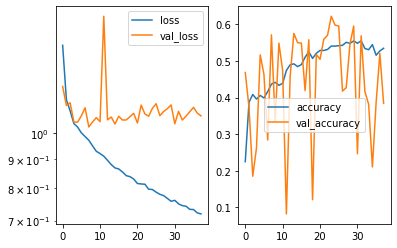

Predicted cell: NonMatureP1 Probability: [[0.9703957]]
True Cell type: Normal
x [[0.50043714]]
True positional value x 0.5
y [[0.5021423]]
True positional value y 0.5
t [[0.5013476]]
True positional value t 0.5
h [[0.50366676]]
True positional value h 0.5
w [[0.50851536]]
True positional value w 0.5
c [[0.99978477]]
True positional value c 1.0


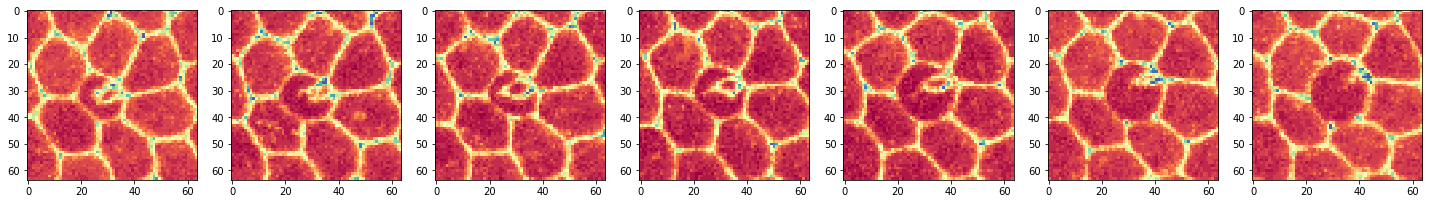

Epoch 39/250
14184/14184 [==============================] - 289s 20ms/step - loss: 0.7176 - accuracy: 0.5188 - val_loss: 1.0826 - val_accuracy: 0.4913

Epoch 00039: saving model to /home/sancere/VKepler/CurieDeepLearningModels/OneatModels/ApoptosisBinning2V1Models/apoptosisd29s3f8.h5


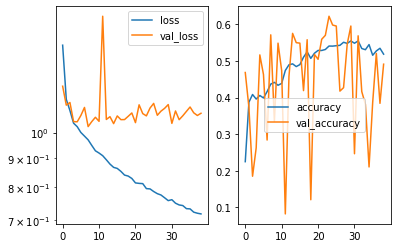

Predicted cell: Division Probability: [[0.9991861]]
True Cell type: Division
x [[0.5048884]]
True positional value x 0.5
y [[0.50676876]]
True positional value y 0.5
t [[0.5210409]]
True positional value t 0.5
h [[0.5050502]]
True positional value h 0.5
w [[0.51025313]]
True positional value w 0.5
c [[0.99971837]]
True positional value c 1.0


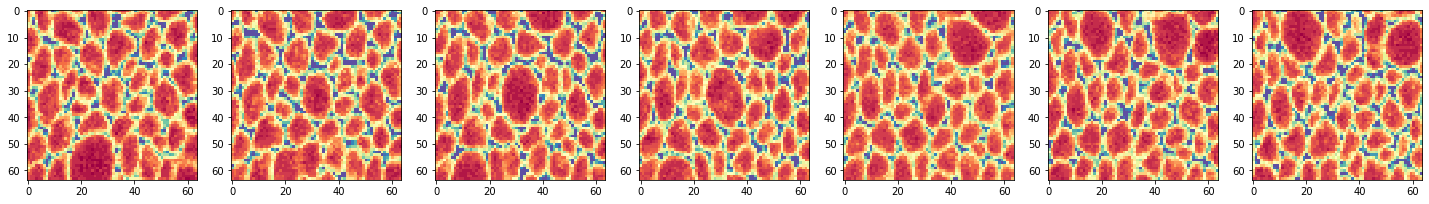

Epoch 40/250
 7208/14184 [==============>...............] - ETA: 2:19 - loss: 0.6991 - accuracy: 0.5434

KeyboardInterrupt: 

In [5]:
Train = NEATDynamic(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()